In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("football_players_dataset_traits_processed.csv", index_col=0)
df.head()

short_name                            full_name  age dateOfBirth  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   28  1993-01-07   
3       K. De Bruyne                      Kevin De Bruyne   29  1991-06-28   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   

   height  weight           positions                 club  \
0     170      72  ['RW', 'ST', 'CF']         FC Barcelona   
1     188      83        ['ST', 'LW']             Juventus   
2     188      87              ['GK']      Atlético Madrid   
3     180      70       ['CM', 'CAM']      Manchester City   
4     175      68       ['LW', 'CAM']  Paris Saint-Germain   

   contract_valid_until  overall_rating  ...  LW  RW  CAM CM  CDM  LB  CB RB  \
0                  2021              93  ...   0   1    0  0    0   0   0  0   
1                  2022              92  ...   1   0    0  0    0   0   0  0   
2                  2023              91  ...   0   0    0  0    0   0   0  0   
3                  2023              91  ...   0   0    1  1    0   0   0  0   
4                  2022              91  ...   1   0    1  0    0   0   0  0   

   GK  years_left_on_contract  
0   0                       0  
1   0                       1  
2   1                       2  
3   0                       2  
4   0                       1  

[5 rows x 64 columns]

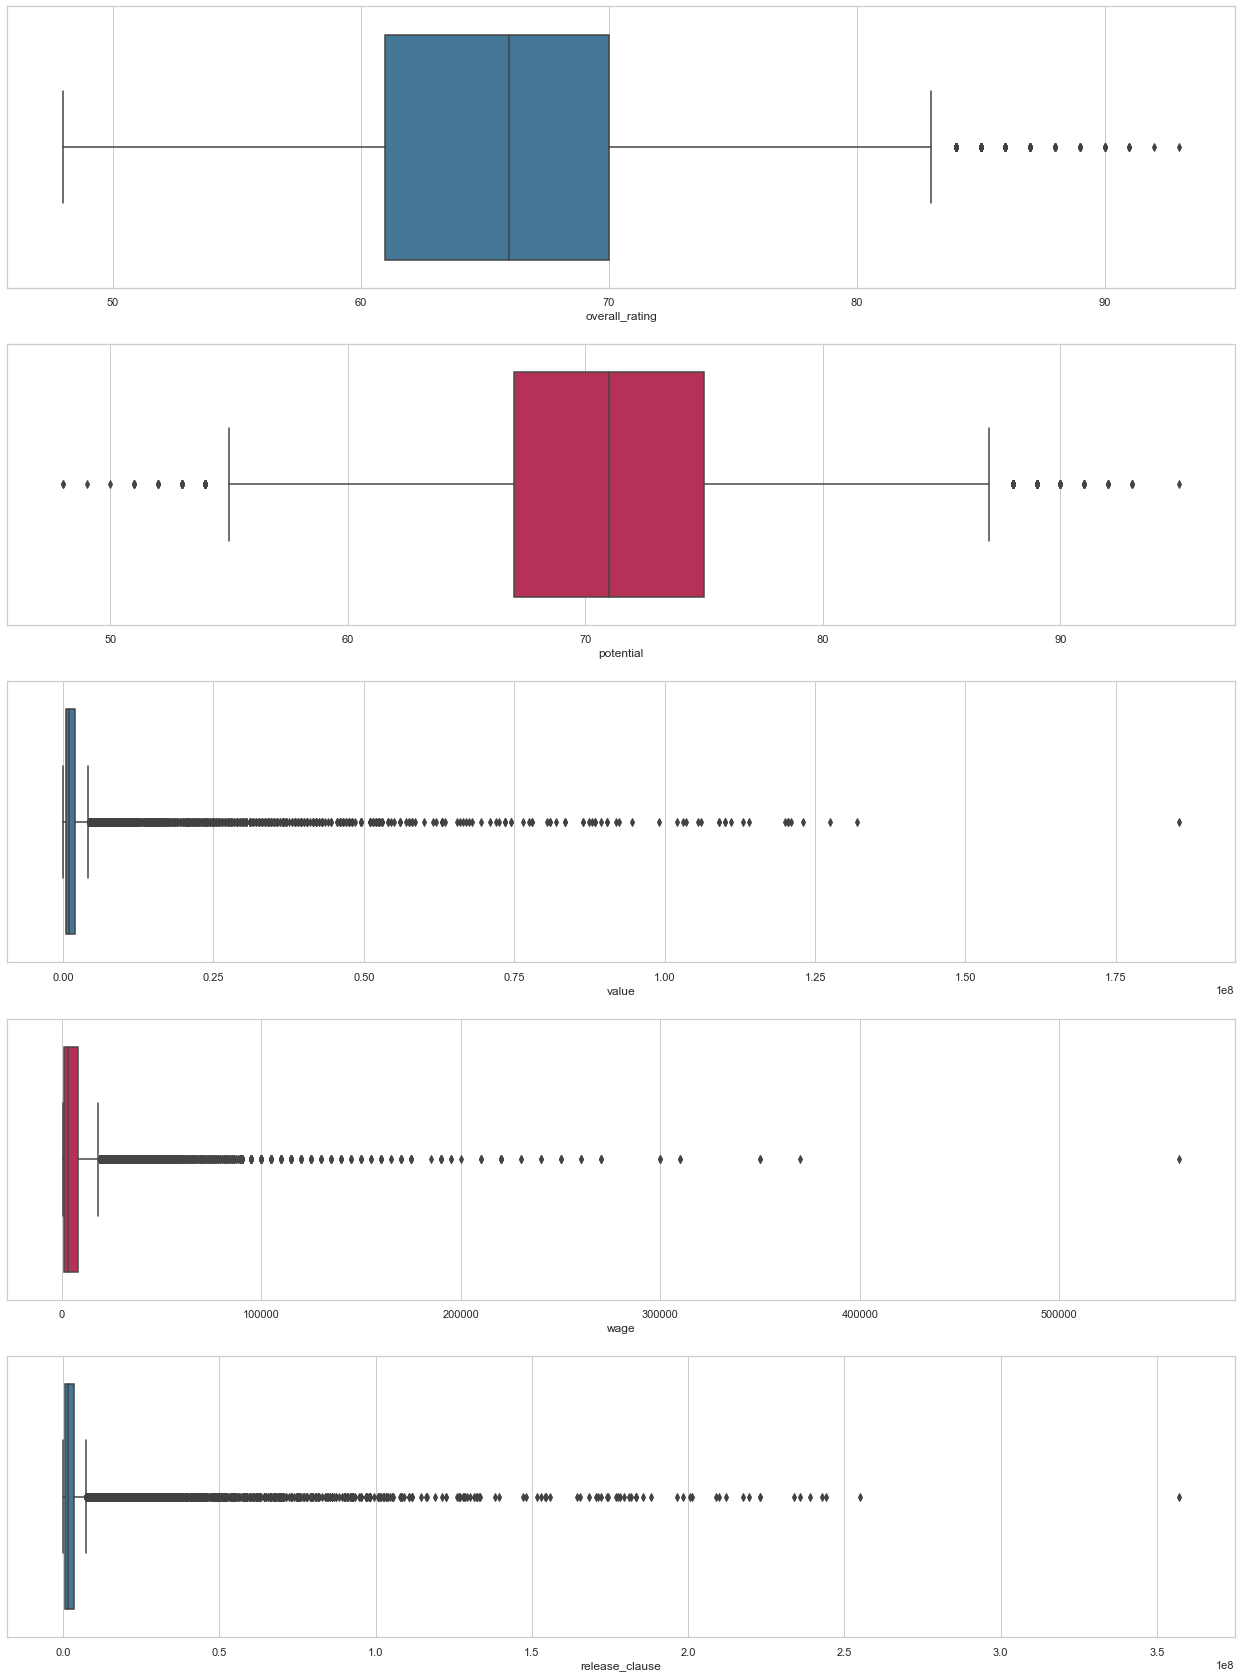

In [67]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(22,30))
sns.set_theme(style="whitegrid")

sns.boxplot(ax=axes[0], x="overall_rating", data=df, palette='mako')
sns.boxplot(ax=axes[1], x="potential", data=df, palette='rocket')
sns.boxplot(ax=axes[2], x="value", data=df, palette='mako')
sns.boxplot(ax=axes[3], x="wage", data=df, palette='rocket')
sns.boxplot(ax=axes[4], x="release_clause", data=df, palette='mako')



plt.show()

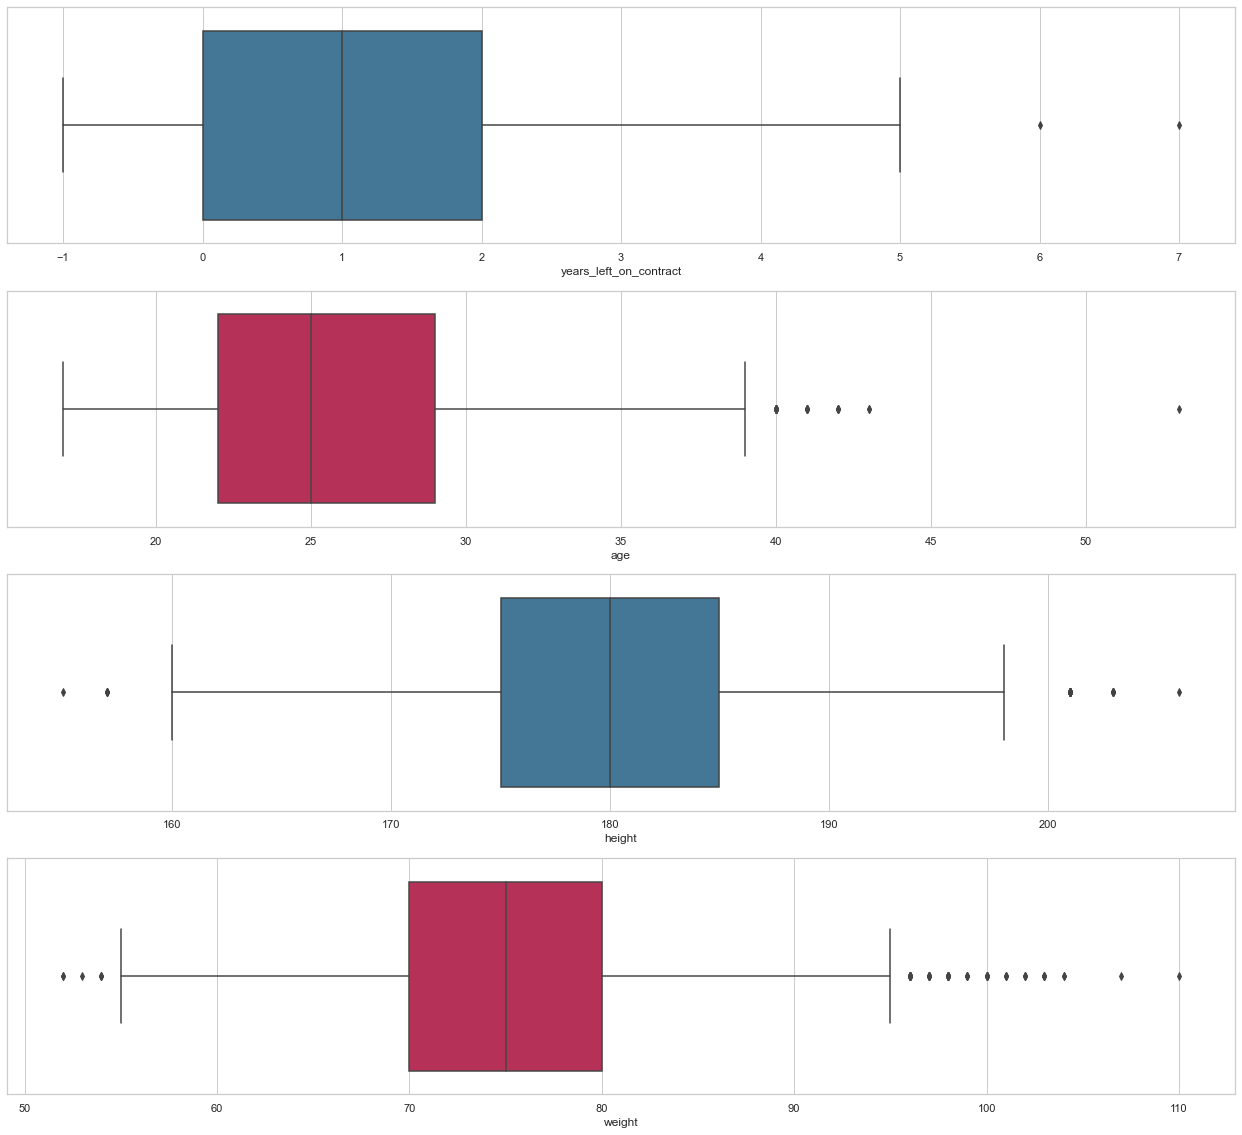

In [66]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(22,20))
sns.set_theme(style="whitegrid")

sns.boxplot(ax=axes[0], x="years_left_on_contract", data=df, palette='mako')
sns.boxplot(ax=axes[1], x="age", data=df, palette='rocket')
sns.boxplot(ax=axes[2], x="height", data=df, palette='mako')
sns.boxplot(ax=axes[3], x="weight", data=df, palette='rocket')


plt.show()

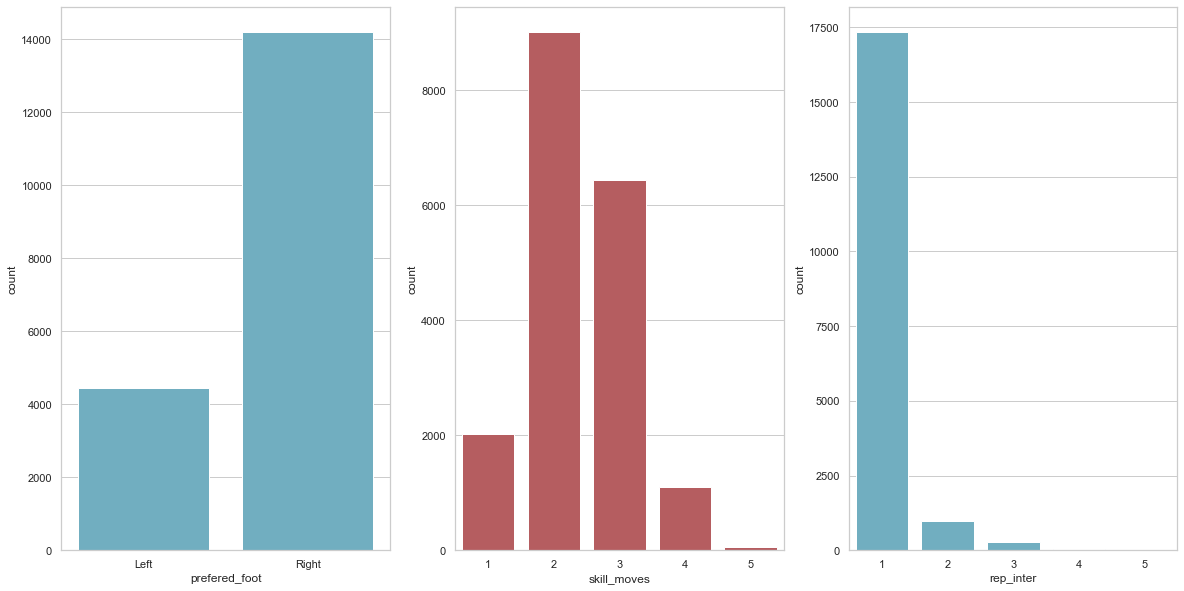

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.set_theme(style="whitegrid")

sns.countplot(ax=axes[0], x="prefered_foot", data=df, color="c")
sns.countplot(ax=axes[1], x="skill_moves", data=df, color="r")
sns.countplot(ax=axes[2], x="rep_inter", data=df, color="c")

plt.show()

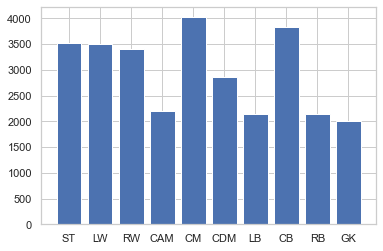

In [61]:
ST = df[df['ST']==1].shape[0]
LW = df[df['LW']==1].shape[0]
RW = df[df['RW']==1].shape[0]
CAM = df[df['CAM']==1].shape[0]
CDM = df[df['CDM']==1].shape[0]
LB = df[df['LB']==1].shape[0]
CB = df[df['CB']==1].shape[0]
RB = df[df['RB']==1].shape[0]
GK = df[df['GK']==1].shape[0]
CM = df[df['CM']==1].shape[0]
X = ['ST','LW','RW','CAM','CM','CDM','LB','CB','RB','GK']
Y = [ST,LW,RW,CAM,CM,CDM,LB,CB,RB,GK]



fig = plt.figure()
plt.bar(X,Y)
plt.show()

In [27]:
temp = df[['age','height','weight','club','overall_rating','potential','wage','value','skill_moves','rep_inter',
          'work_rate','release_clause','years_left_on_contract']]

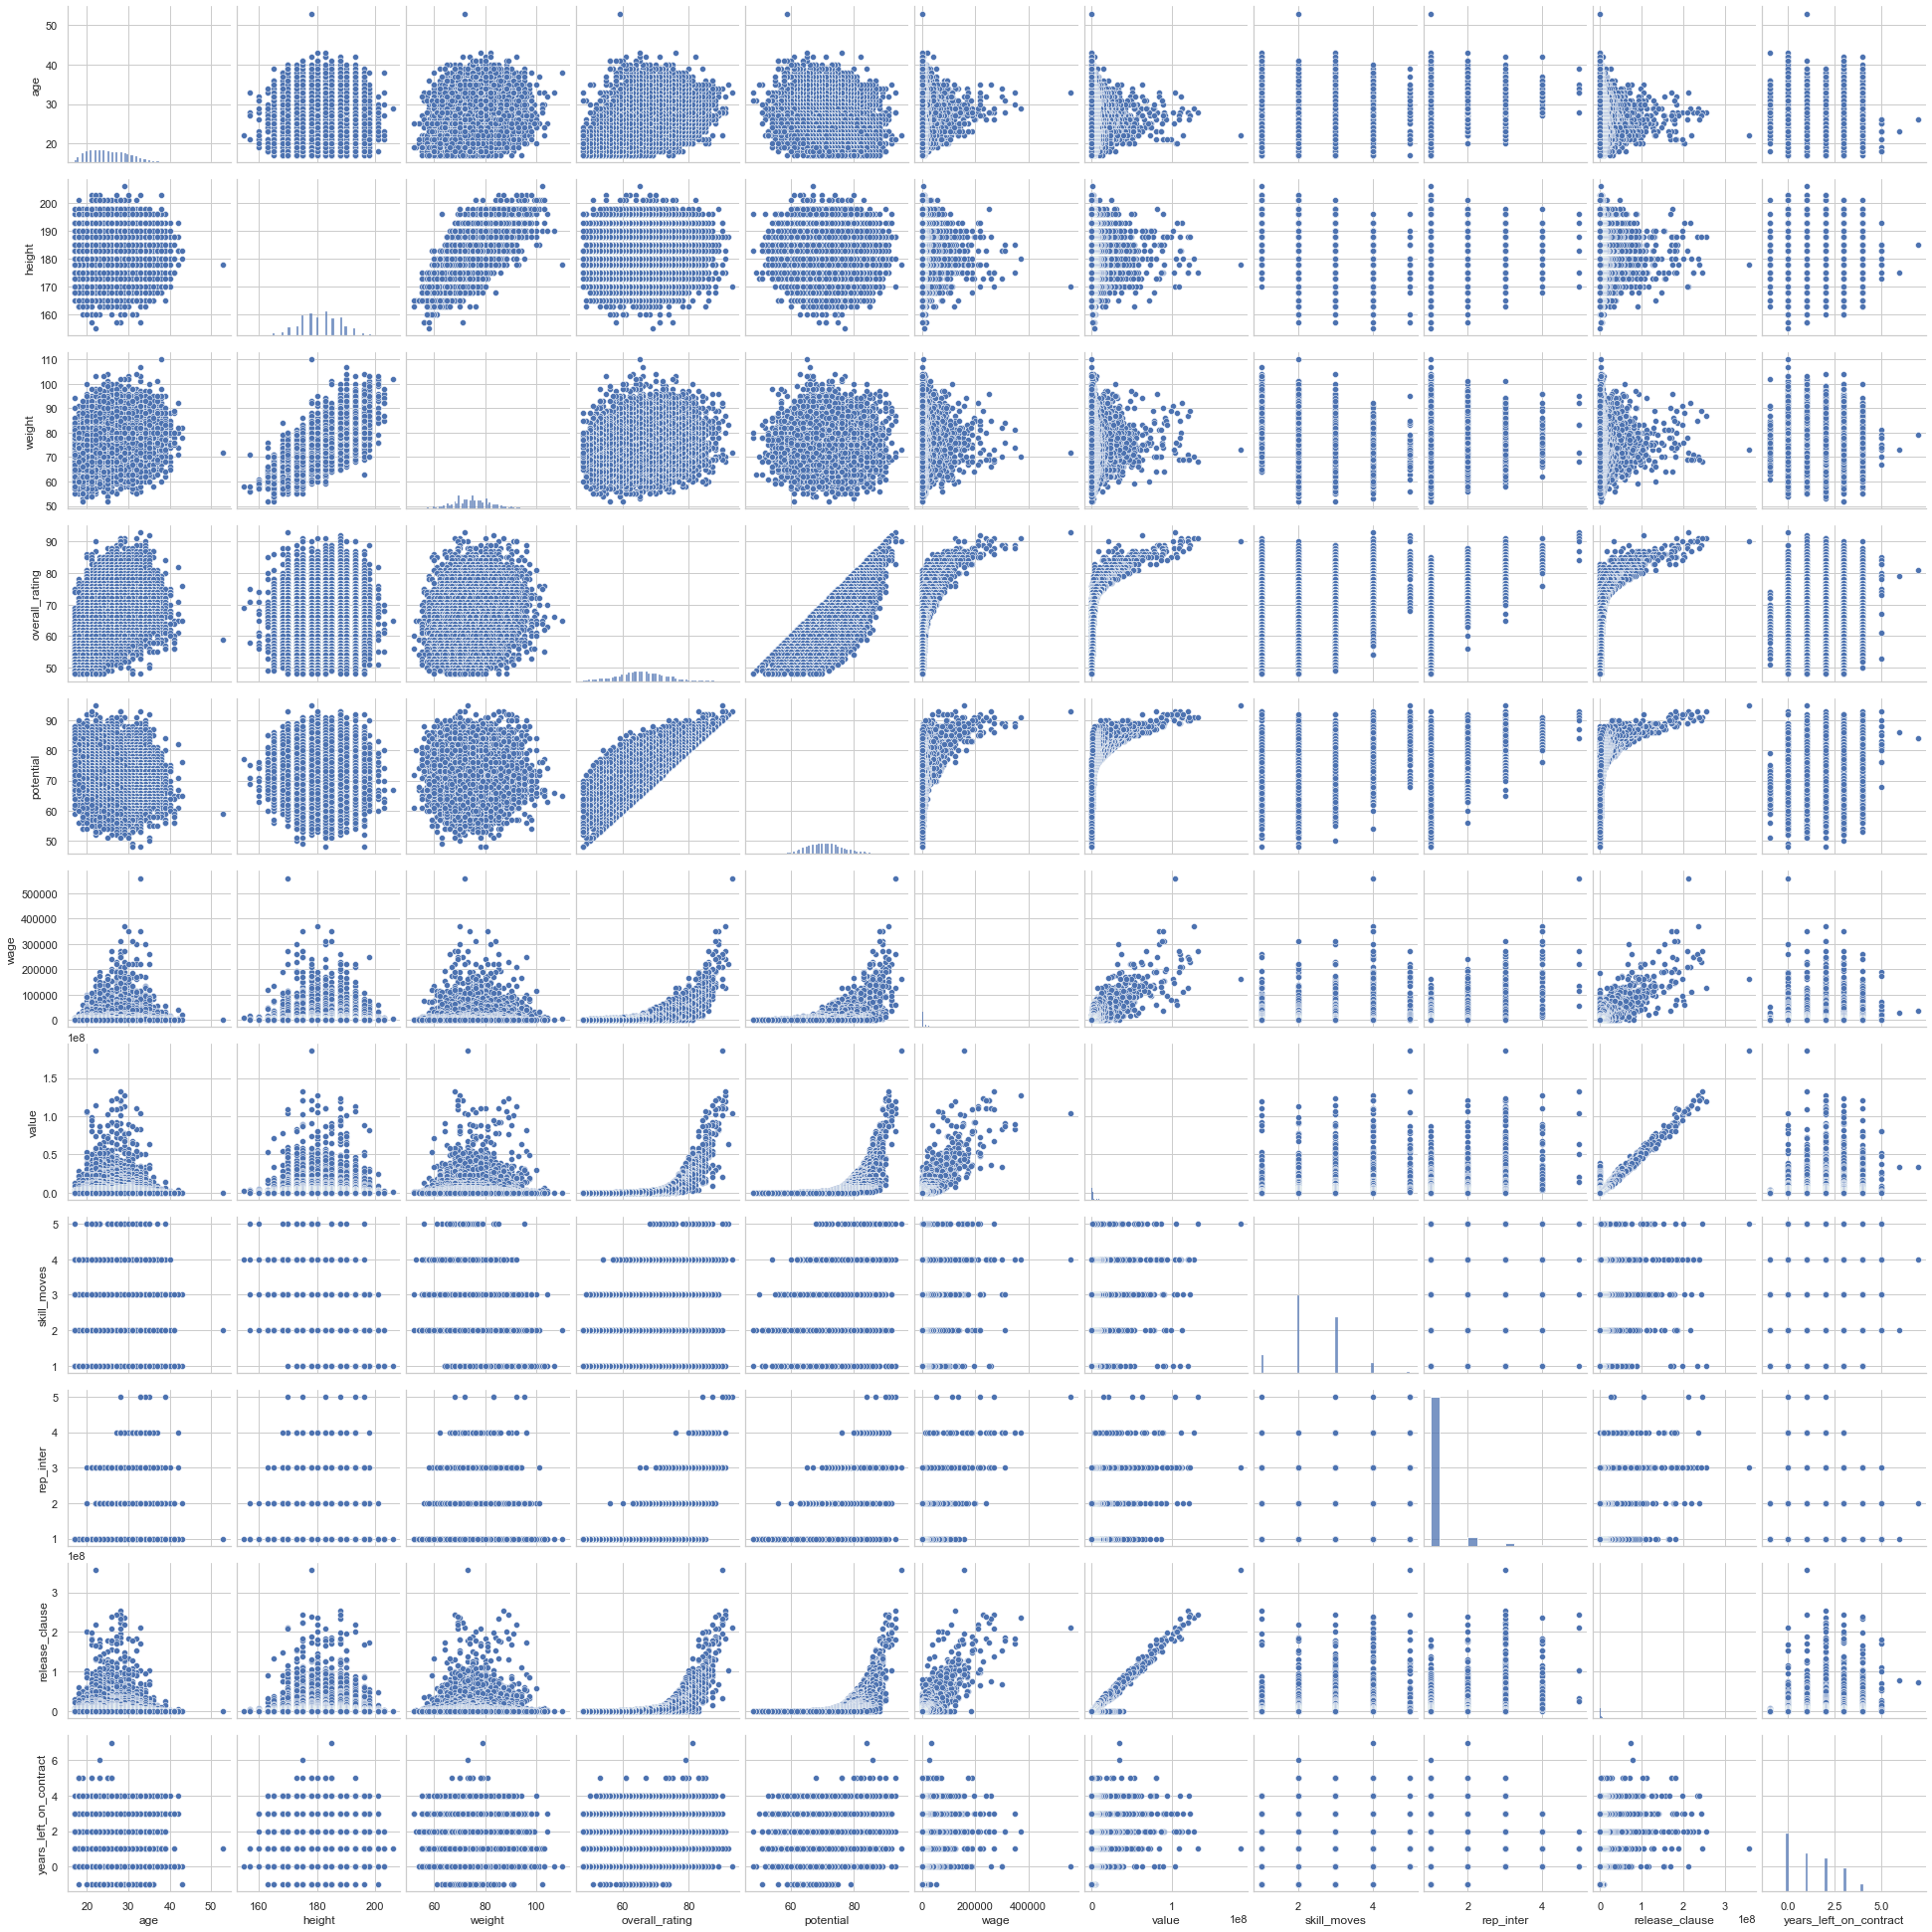

In [30]:
sns.pairplot(temp)
plt.show()

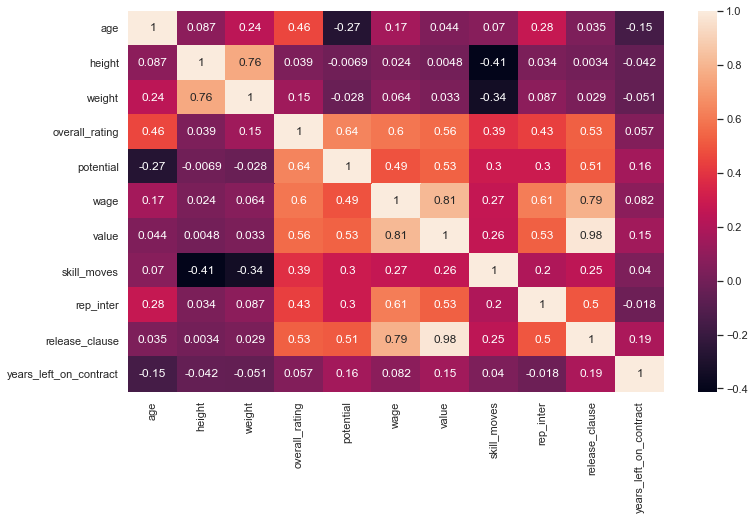

In [29]:
corrMatrix = temp.corr()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [65]:
from sklearn.decomposition import PCA

temp2 = temp.drop(columns=['club','work_rate'])
pca = PCA()
pca.fit(temp2)
print('Variance expliquée', pca.explained_variance_ratio_)
print('\n Valeurs Singulières',pca.singular_values_)


Variance expliquée [9.93373080e-01 6.62645027e-03 4.69836398e-07 3.06479928e-13
 1.52272786e-13 1.15476237e-13 3.73728951e-14 8.96858066e-15
 4.94785790e-15 1.33875393e-15 2.52845913e-16]

 Valeurs Singulières [2.27097900e+09 1.85480132e+08 1.56181739e+06 1.26141486e+03
 8.89135750e+02 7.74289264e+02 4.40489232e+02 2.15783774e+02
 1.60274908e+02 8.33695209e+01 3.62313816e+01]
